The Consumer Price Index (CPI) measures the monthly change in prices paid by U.S. consumers. 
The U.S. Bureau of Labor Statistics (BLS) calculates the CPI as a weighted average of prices 
for a basket of goods and services representative of aggregate U.S. consumer spending.


1. Importing your libraries and data
2. Data wrangling 
3. Subsetting and cleaning
4. Time-series analysis: decomposition
5. Dickey-Fuller Test: Testing for stationarity 
6. Stationarizing the Federal Reserve Economic Data

In [ ]:
# 1. Importing your libraries and data

In [3]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

In [4]:
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [5]:
quandl.ApiConfig.api_key = 'kEiWLxRbxJytxeg2-o9V'

In [16]:
data = quandl.get('FRED/CPIAUCSL')

In [ ]:
# 2. Data wrangling and cleaning 

In [19]:
data.head()

,Value
Date,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


In [20]:
data.shape

(901, 1)

In [21]:
data.columns

Index(['Value'], dtype='object')

In [22]:
data2 = data.reset_index()

In [24]:
data2.head()

,Date,Value
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [ ]:
# 3.Subsetting and cleaning

In [27]:
data_sub = data2.loc[(data2['Date'] >= '1980-01-01') & (data2['Date'] < '2020-06-01')]

In [ ]:
# Set the "Date" column as the index

In [30]:
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from \"Date
data_sub = data_sub.set_index('datetime')  # Set the datetime as the index of the dataframe
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the \"Date\" column
data_sub.head()

,Value
datetime,
1980-01-01,78.0
1980-02-01,79.0
1980-03-01,80.1
1980-04-01,80.9
1980-05-01,81.7


In [39]:
data_sub.isnull().values.any() # Checking missing values

False

In [40]:
data_sub.isna().values.any() # Checking missing values

False

In [41]:
# 4. Time-series analysis: decomposition

In [42]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [50]:
from pylab import rcParams # This will define a fixed size for all special charts.\n",

rcParams['figure.figsize'] =12, 7

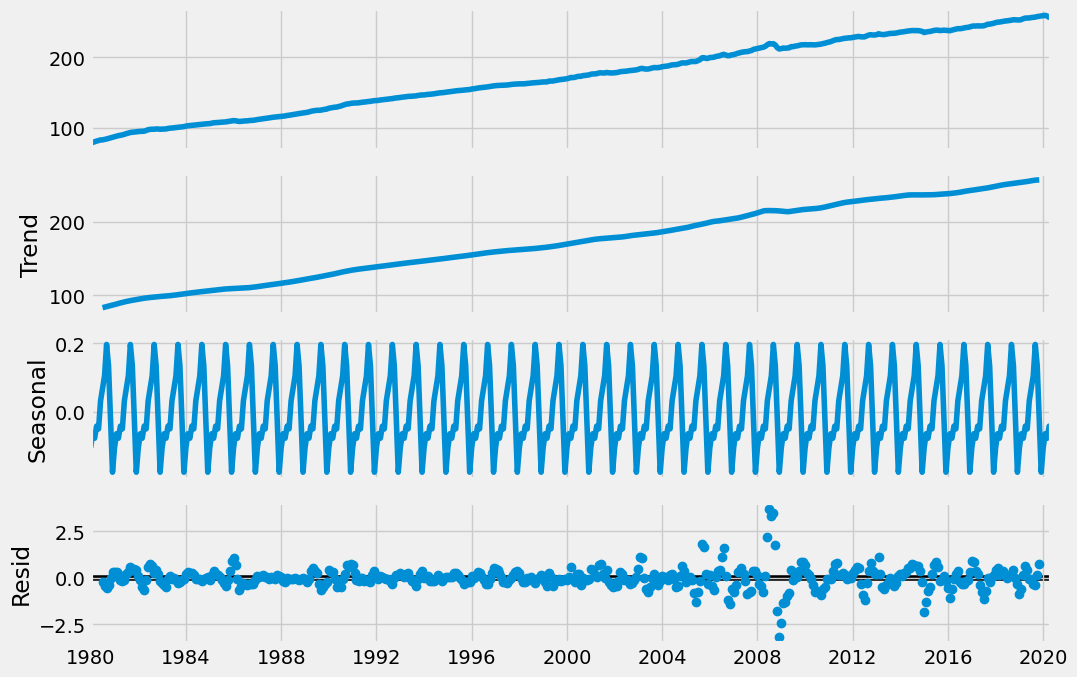

In [52]:
decomposition.plot()
plt.show()

Interpretation:
- Consumer Price Index is increasing as a Trend. That means consumers have to pay more for goods.
- We see a small peaks, high and low, around 2008 in the noise - residual

In [54]:
# 5. Dickey-Fuller Test: Testing for stationarity 

In [55]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return an array of numbers.

from statsmodels.tsa.stattools import adfuller 
    
def dickey_fuller(timeseries): # Define the function,   
    
  # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
     result['Critical Value (%s)'%key] = value
     print (result)
# Apply the test using the function on the time series

dickey_fuller(data_sub['Value']) 

Dickey-Fuller Stationarity test:
Test Statistic                  -0.666323
p-value                          0.855281
Number of Lags Used             15.000000
Number of Observations Used    469.000000
Critical Value (1%)             -3.444370
dtype: float64
Test Statistic                  -0.666323
p-value                          0.855281
Number of Lags Used             15.000000
Number of Observations Used    469.000000
Critical Value (1%)             -3.444370
Critical Value (5%)             -2.867722
dtype: float64
Test Statistic                  -0.666323
p-value                          0.855281
Number of Lags Used             15.000000
Number of Observations Used    469.000000
Critical Value (1%)             -3.444370
Critical Value (5%)             -2.867722
Critical Value (10%)            -2.570063
dtype: float64


Dickey-Fuller test Interpretation:
- p-value(0.855281) is above 0.05 -> not significant
- Critical Value is > the Statistic Test
- Time series is non - stationary

In [56]:
# 6. Stationarizing the Federal Reserve Economic Data

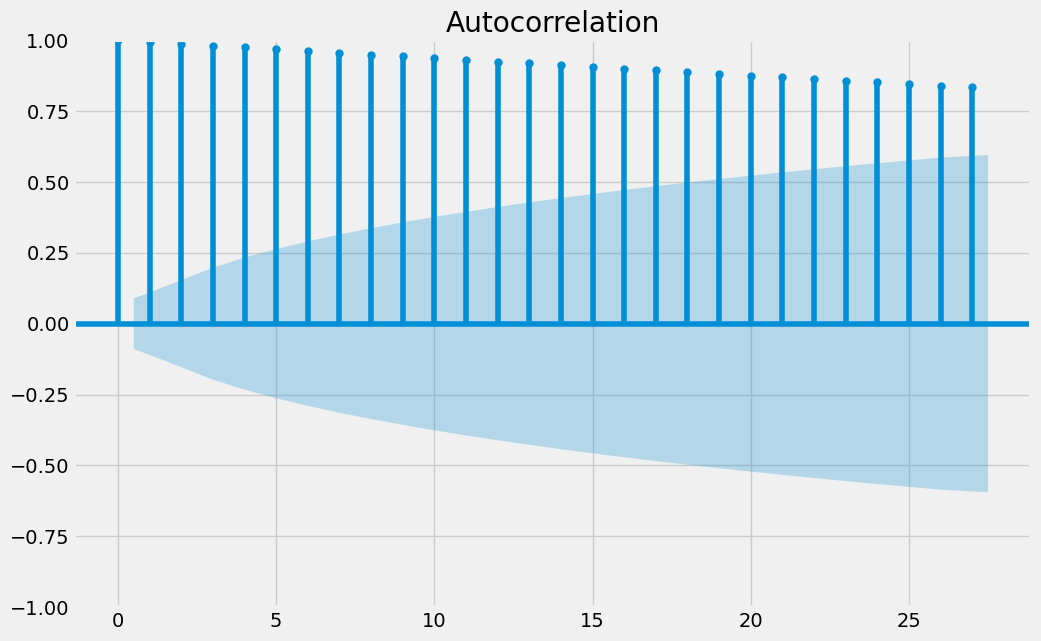

In [58]:
# Check plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # import autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

The vertical lines represent the lags in the series, while the blue area represents the confidence interval

When lines go above the blue edge of the confidence interval, this means you have lags that are significantly correlated with each other

When there are many lags beyond this interval, you can deduce that your data is non-stationary.

Time series has quite a few lags correlated with each other

In [ ]:
# 6. Stationarizing the Federal Reserve Economic Data

In [61]:
# Differencing:
# This involves calculating the difference between every value (t) and its lag (t -1) and storing the results in a new dataframe

In [62]:
CPI_diff = data_sub - data_sub.shift(1)

In [63]:
CPI_diff.dropna(inplace = True)

In [64]:
CPI_diff.head()

,Value
datetime,
1980-02-01,1.0
1980-03-01,1.1
1980-04-01,0.8
1980-05-01,0.8
1980-06-01,0.8


In [65]:
CPI_diff.columns

Index(['Value'], dtype='object')

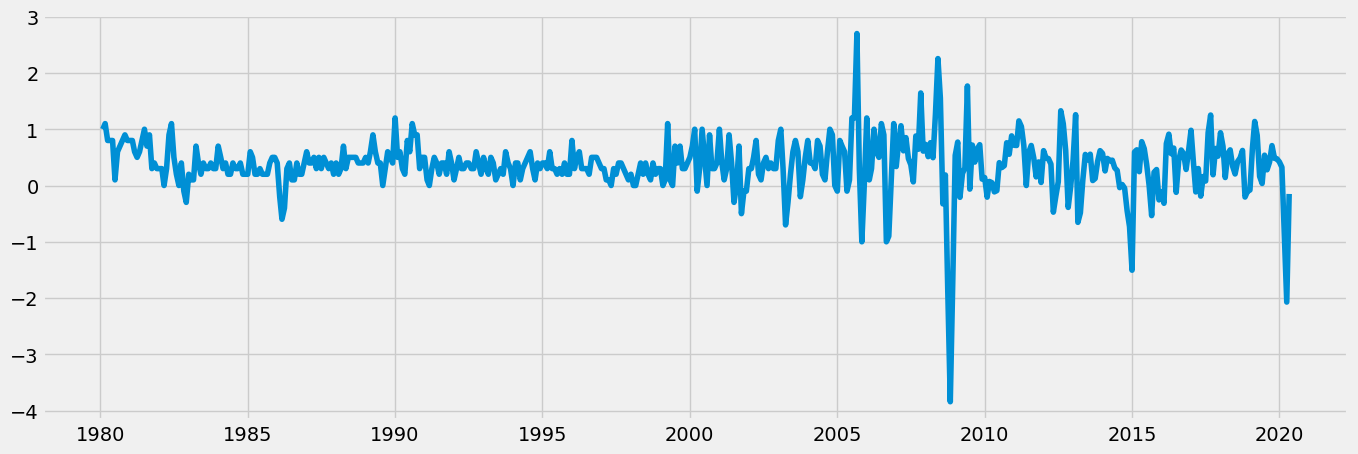

In [66]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(CPI_diff)

In [67]:
dickey_fuller(CPI_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -5.391321
p-value                          0.000004
Number of Lags Used             14.000000
Number of Observations Used    469.000000
Critical Value (1%)             -3.444370
dtype: float64
Test Statistic                  -5.391321
p-value                          0.000004
Number of Lags Used             14.000000
Number of Observations Used    469.000000
Critical Value (1%)             -3.444370
Critical Value (5%)             -2.867722
dtype: float64
Test Statistic                  -5.391321
p-value                          0.000004
Number of Lags Used             14.000000
Number of Observations Used    469.000000
Critical Value (1%)             -3.444370
Critical Value (5%)             -2.867722
Critical Value (10%)            -2.570063
dtype: float64


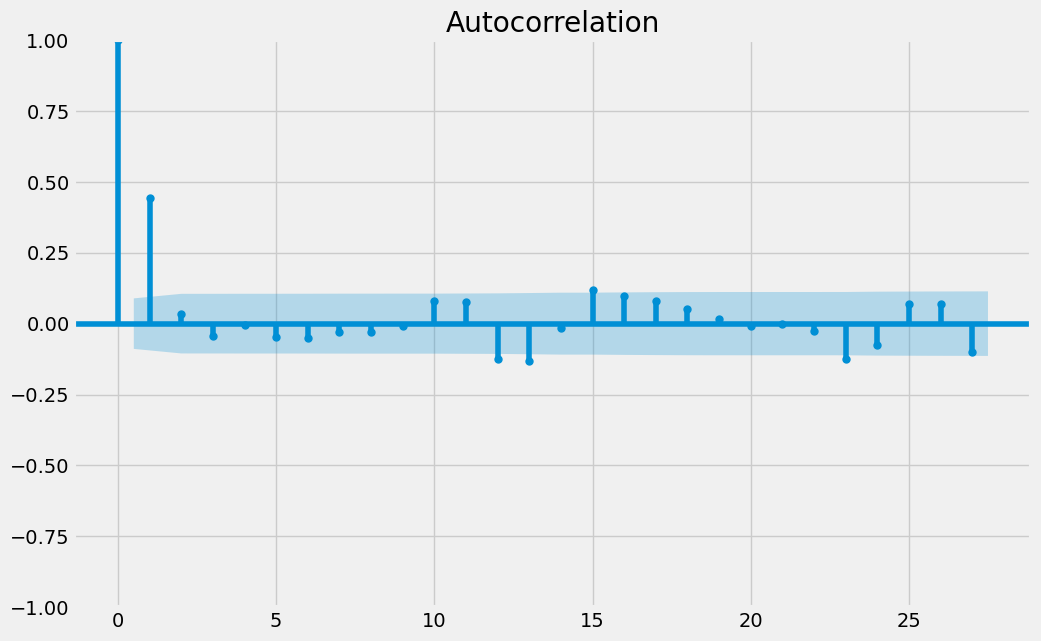

In [68]:
plot_acf(CPI_diff)
plt.show()

Interpretation:
- Stationarizing with Differencing leads to test statistic which is smaller than the critical value.
- So 0 Hypothesis can be rejected and the data series is stationary
- The Autocorrelation plot has improved